In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [2]:
data = pd.read_csv('data_poly.csv')

In [3]:
data

,x,y
0,0,3
1,1,4
2,2,5
3,3,7
4,4,10
5,5,8
6,6,9
7,7,10
8,8,10
9,9,23


<AxesSubplot:xlabel='x', ylabel='y'>

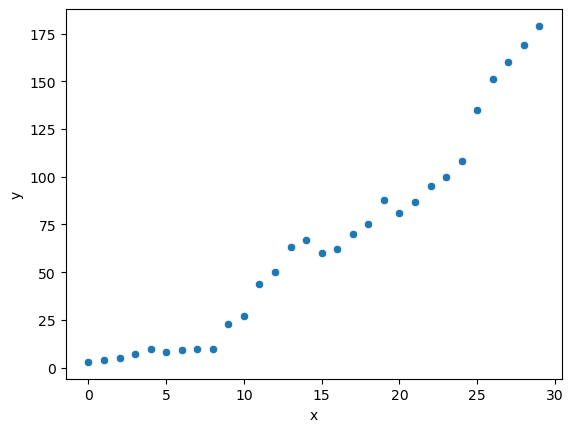

In [5]:
sns.scatterplot(x = 'x', y = 'y', data=data )

In [7]:
model = LinearRegression()
model.fit(data[['x']], data['y'])

LinearRegression()

In [8]:
data_pred = model.predict(data[['x']])

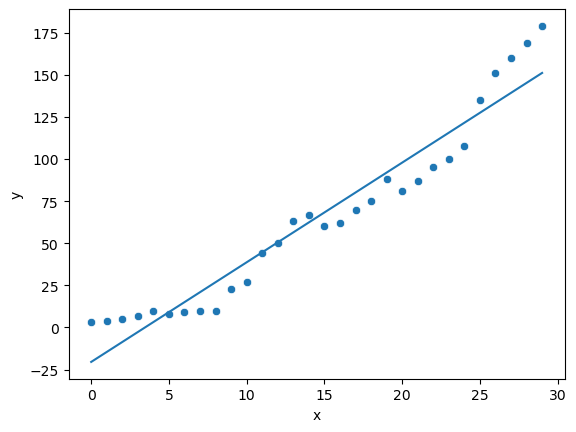

In [10]:
sns.scatterplot(x = 'x', y = 'y', data=data )
plt.plot(data_pred)

In [ ]:
x, z

1,x,z,x^2,z^2,xz

In [ ]:
x

1, x^2, x

In [43]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_5 = PolynomialFeatures(degree=5, include_bias=False)
poly_15 = PolynomialFeatures(degree=15, include_bias=False)

In [44]:
poly_x = poly.fit_transform(data[['x']])
poly_x3 = poly_3.fit_transform(data[['x']])
poly_x5 = poly_5.fit_transform(data[['x']])
poly_x15 = poly_15.fit_transform(data[['x']])

In [45]:
model = LinearRegression()
model_3 = LinearRegression()
model_5 = LinearRegression()
model_15 = LinearRegression()


model.fit(poly_x, data['y'])
model_3.fit(poly_x3, data['y'])
model_5.fit(poly_x5, data['y'])
model_15.fit(poly_x15, data['y'])

LinearRegression()

In [46]:
data_pred_poly = model.predict(poly_x)

data_pred_poly_3 = model_3.predict(poly_x3)
data_pred_poly_5 = model_5.predict(poly_x5)
data_pred_poly_15 = model_15.predict(poly_x15)

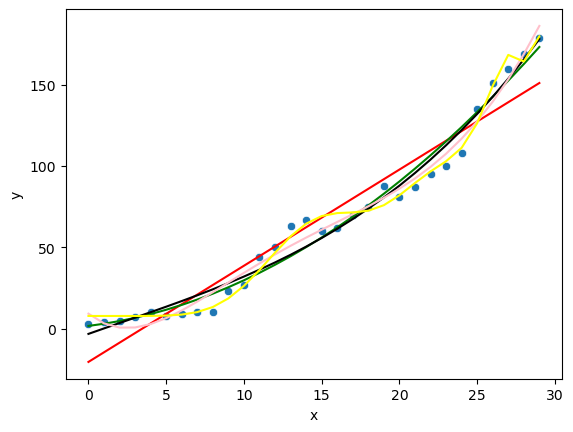

In [63]:
sns.scatterplot(x = 'x', y = 'y', data=data )
plt.plot(data_pred,color = 'red')
plt.plot(data_pred_poly, color = 'green')
plt.plot(data_pred_poly_3, color = 'black')
plt.plot(data_pred_poly_5, color = 'pink')
plt.plot(data_pred_poly_15, color = 'yellow')

In [55]:
print("MAPE of Straight Line = ",mean_absolute_percentage_error(data['y'],data_pred))
print("MAPE of Polynomial degree 2 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly))
print("MAPE of Polynomial degree 3 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly_3))
print("MAPE of Polynomial degree 5 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly_5))
print("MAPE of Polynomial degree 15 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly_15))

MAPE of Straight Line =  0.7996999195631865
MAPE of Polynomial degree 2 Line =  0.2031995437736923
MAPE of Polynomial degree 3 Line =  0.32043050951182656
MAPE of Polynomial degree 5 Line =  0.2942388626809141
MAPE of Polynomial degree 15 Line =  0.17432462595126647


In [ ]:
accuracy of simple model = 85% 
acuuracy of little complex = 92% #1~ hour # 7% improvement
accuracy of very much complex = 93% # 5~ hours # 1% improvement



In [59]:
(92 -85)/92

0.07608695652173914

In [60]:
(93-92)/93

0.010752688172043012

In [ ]:
accuracy of simple model = 85% 
acuuracy of little complex = 87% #1~ hour # 2% improvement
accuracy of very much complex = 90% # 5~ hours # 3% improvement

In [61]:
(87 -85)/87

0.022988505747126436

In [62]:
(90 -87)/90

0.03333333333333333

In [ ]:
#train and test

In [73]:
train_X, test_X, train_y, test_y  = train_test_split(data[['x']],data['y'], test_size=0.35, random_state=1)


In [74]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((19, 1), (11, 1), (19,), (11,))

In [146]:
def model_run(model, train_X, test_X, train_y, test_y):
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    r2_train = r2_score(train_y,train_pred)
    r2_test = r2_score(test_y,test_pred)
    return r2_train, r2_test

In [147]:
test_X.shape

(11, 1)

In [155]:
trainerr = []
testerr = []

for i in range(0,10):
    if i ==0:
        model = LinearRegression()
        mape_train, mape_test = model_run(model, train_X, test_X, train_y, test_y)
        trainerr.append(1-mape_train)
        testerr.append(1-mape_test)
        
        
    else:
        poly = PolynomialFeatures(degree=i, include_bias=False)
        poly_feature_train_x = poly.fit_transform(train_X)
        poly_feature_test_x = poly.transform(test_X)
        ploy_model = LinearRegression()
        error_train, error_test = model_run(ploy_model, poly_feature_train_x, poly_feature_test_x, train_y, test_y)
        trainerr.append(1-error_train)
        testerr.append(1-error_test)


In [156]:
mapetest

[0.22663642741156087,
 0.22663642741156087,
 0.1208845902586877,
 0.15168780978673024,
 0.09098213255413878,
 0.08470345633138698,
 0.022128846523611134,
 0.031788993295670864,
 0.039710433062164485,
 0.09731107017417517,
 0.22663642741156087,
 0.22663642741156087,
 0.22663642741156087]

In [157]:
trainerr

[0.051213134574498276,
 0.051213134574498276,
 0.011386977902735462,
 0.01090985442225223,
 0.008776381124455668,
 0.008509637007715898,
 0.004567371269360132,
 0.004215816041595377,
 0.002937429594913832,
 0.0017142263104424904]

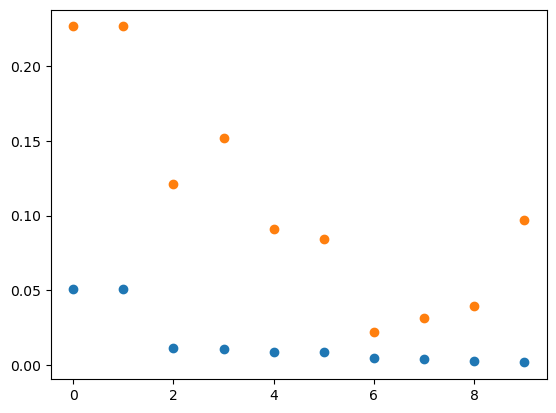

In [158]:
plt.scatter(x = range(0,10), y = trainerr)
plt.scatter(x = range(0,10), y = testerr)


In [ ]:
a + b = 11

In [ ]:
a = 0 -> .fit()
a+b    -> .transform()

In [ ]:
a = 0 , a+b .fit_transform()

In [ ]:
.fit -> initializing
.transform -> applying
.fit_transform -> initializing and applying

In [ ]:
initializing -> Training 
transform/ applying -> train and test
initializing can it happen on test -> NO

In [ ]:
Scaling ->

In [ ]:
z = x-mean/std

In [ ]:
train -> Fit
mean - column A = 23 
Std - column A = 2

transform ->
z = x-mean/std

Fit_transform
Find mean and Std and find Z score



Test -> Fit
mean - column A = 12 
Std - column A = 5


Test -> Transform
mean - column A = 12 
Std - column A = 5



In [ ]:
80 sample train mean = 30
20 sample test  mean = 20

80 sample train std = 2
20 sample test  std = 4

train 
X,y


Test
X


------------------------

train+ Test

**X**, y   -> Fit
**X**, na


Realtime 

test data  -> never fit






In [ ]:
Apple or Orange


500 data 300 apple + 200 orange

In [ ]:
train.<-> test

In [ ]:
train - 200 apple+100 orange
test - 100 apple+50 orange

In [ ]:
train - > fit model
extracting feautures -> color, shape , weight , height
Class - - Object - function -> intialize -> feature ->
Extracted the features

Featute Object-> Live -> not deallocate 

Creating Model

Model Object - > LinearRegression()
Model Object-> Live -> not deallocate 



Test 

use same

Featute Object - > extract the feature of test data

Model Object -> Predict



In [125]:
model

LinearRegression()

In [126]:
model.intercept_

-21.630919501515642